# 1. IO编程

IO在计算机中指Input/Output，也就是输入和输出。由于程序和运行时数据是在内存中驻留，由CPU这个超快的计算核心来执行，涉及到数据交换的地方，通常是磁盘、网络等，就需要IO接口。

IO编程中，Stream（流）是一个很重要的概念，可以把流想象成一个水管，数据就是水管里的水，但是只能单向流动。Input Stream就是数据从外面（磁盘、网络）流进内存，Output Stream就是数据从内存流到外面去。对于浏览网页来说，浏览器和Web服务器之间至少需要建立两根水管，才可以既能发数据，又能收数据。


由于CPU和内存的速度远远高于外设的速度，所以，在IO编程中，就存在速度严重不匹配的问题。举个例子来说，比如要把100M的数据写入磁盘，CPU输出100M的数据只需要0.01秒，可是磁盘要接收这100M数据可能需要10秒，怎么办呢？有两种办法：

第一种是CPU等着，也就是程序暂停执行后续代码，等100M的数据在10秒后写入磁盘，再接着往下执行，这种模式称为同步IO；

另一种方法是CPU不等待，只是告诉磁盘，“您老慢慢写，不着急，我接着干别的事去了”，于是，后续代码可以立刻接着执行，这种模式称为异步IO。

## 1.1 文件读写

### 1.1.1 写入测试文件：

In [1]:
%%writefile test.txt
this is a test file.
hello world!
python is good!
today is a good day.

Writing test.txt


### 1.1.2 读文件

读写文件前，我们先必须了解一下，在磁盘上读写文件的功能都是由操作系统提供的，现代操作系统不允许普通的程序直接操作磁盘，所以，读写文件就是请求操作系统打开一个文件对象（通常称为文件描述符），然后，通过操作系统提供的接口从这个文件对象中读取数据（读文件），或者把数据写入这个文件对象（写文件）

使用 `open` 函数来打开文件，使用文件名的字符串作为输入参数：

In [3]:
f = open('test.txt')
#f = open('C:\\Code\\python\\Python-Course-HK\\day6-文件IO\\test.txt')  # f = open('test.txt'， ‘r’)

#f = open('/Users/kaikeba/Downloads/Python-Course-HK/day6-文件IO/test.txt')
print(type(f))

<class '_io.TextIOWrapper'>


默认以读的方式打开文件，如果文件不存在会报错。

可以使用 `read` 方法来读入文件中的所有内容：

In [6]:
text = f.read()
print(text)

this is a test file.
hello world!
python is good!
today is a good day.


使用完文件之后，需要将文件关闭。

In [7]:
f.close()

也可以按照行读入内容，`readlines` 方法返回一个列表，每个元素代表文件中每一行的内容：

In [8]:
f = open('test.txt')
lines = f.readlines()
print(lines)
f.close()

['this is a test file.\n', 'hello world!\n', 'python is good!\n', 'today is a good day.']


事实上，我们可以将 `f` 放在一个循环中，得到它每一行的内容：

In [9]:
f = open('test.txt')
for line in f:
    print(line)
f.close()

this is a test file.

hello world!

python is good!

today is a good day.


删除刚才创建的文件：

In [10]:
import os
os.remove('test.txt')

### 1.1.3 写文件

我们使用 `open` 函数的写入模式来写文件：

In [4]:
f = open('myfile.txt', 'w')  # 'w'  'r'  'w+'
f.write('hello world!')
f.close()

使用 `w` 模式时，如果文件不存在会被创建，我们可以查看是否真的写入成功：

In [5]:
print(open('myfile.txt').read())

hello world!


如果文件已经存在， `w` 模式会覆盖之前写的所有内容：

In [13]:
f = open('myfile.txt', 'w')
f.write('another hello world!')
f.close()
print(open('myfile.txt').read())

another hello world!


除了写入模式，还有追加模式 `a` ，追加模式不会覆盖之前已经写入的内容，而是在之后继续写入：

In [14]:
f = open('myfile.txt', 'a') #append
f.write('... and more')
f.close()
print(open('myfile.txt').read())

another hello world!... and more


写入结束之后一定要将文件关闭，否则可能出现内容没有完全写入文件中的情况。

还可以使用读写模式 `w+`：

In [8]:
f = open('myfile.txt', 'r+')  #"r+"   'w+'  'a+' "r" "w"  "a"
#f.write('hello world!')
#f.seek(6)
print (f.read())
f.seek(2)
f.write("yy");
f.seek(0)
print(f.read())
f.close()

heyyo world!
heyyo world!


这里 `f.seek(6)` 移动到文件的第6个字符处，然后 `f.read()` 读出剩下的内容。

In [18]:
import os
os.remove('myfile.txt')

### 1.1.4  二进制文件

二进制读写模式 wb：

In [9]:
import os
f = open('binary.bin', 'wb')

f.write(os.urandom(4))  #随机生成n个字节的串
f.close()

f = open('binary.bin', 'rb')
result = repr(f.read())
print(result)   # repr()  返回一个对象的 string 格式 (字节字符串格式，而非文本字符串)
#print(f.read())
f.close()

b'l\xcf\xbe\xa7'


In [ ]:
import os
os.remove('binary.bin')

如果想从二进制模式的文件中读取或写入文本数据，必须确保要进行解码和编码操作。

In [10]:
with open('somefile.bin', 'wb') as f:
    text = 'Hello World'
    f.write(text.encode('utf-8'))

with open('somefile.bin', 'rb') as f:
    data = f.read(16)
    text = data.decode('utf-8')
    print(text)

Hello World


### 1.1.5 字符编码


**ASCII**

记住一句话：计算机中的所有数据，不论是文字、图片、视频、还是音频文件，本质上最终都是按照类似 01010101 的二进制存储的。
    
再说简单点，计算机只懂二进制数字！

每个电平称为一个比特为，约定8个比特位构成一个字节，这样计算机就可以用127个不同字节来存储英语的文字了。这就是ASCII编码

**扩展ANSI编码**

刚才说了，最开始，一个字节有八位，但是最高位没用上，默认为0；后来为了计算机也可以表示拉丁文，就将最后一位也用上了，

从128到255的字符集对应拉丁文啦。至此，一个字节就用满了！

**GB2312**

计算机漂洋过海来到中国后，问题来了，计算机不认识中文，当然也没法显示中文；而且一个字节所有状态都被占满了，

重写一张表，直接生猛地将扩展的第八位对应拉丁文全部删掉，规定一个小于127的字符的意义与原来相同，

但两个大于127的字符连在一起时，就表示一个汉字，前面的一个字节（他称之为高字节）从0xA1用到0xF7，后面一个字节（低字节）从0xA1到0xFE，
    
这样我们就可以组合出大约7000多个简体汉字了；这种汉字方案叫做 “GB2312”。GB2312 是对 ASCII 的中文扩展。

**GBK 和 GB18030编码**

但是汉字太多了，GB2312也不够用，于是规定：只要第一个字节是大于127就固定表示这是一个汉字的开始，不管后面跟的是不是扩展字符集里的内容。
    
结果扩展之后的编码方案被称为 GBK 标准，GBK 包括了 GB2312 的所有内容，同时又增加了近20000个新的汉字（包括繁体字）和符号。

**UNICODE编码**

很多其它国家都搞出自己的编码标准，彼此间却相互不支持。这就带来了很多问题。

于是，国际标谁化组织为了统一编码：提出了标准编码准则：UNICODE 。

UNICODE是用两个字节来表示为一个字符，它总共可以组合出65535不同的字符，这足以覆盖世界上所有符号（包括甲骨文）

**utf8**

    unicode都一统天下了，为什么还要有一个utf8的编码呢？
    大家想，对于英文世界的人们来讲，一个字节完全够了，比如要存储A,本来00010001就可以了，现在吃上了unicode的大锅饭，
    得用两个字节：00000000 00010001才行，浪费太严重！
    基于此，美利坚的科学家们提出了天才的想法：utf8.
    UTF-8（8-bit Unicode Transformation Format）是一种针对Unicode的可变长度字符编码，它可以使用1~4个字节表示一个符号，根据
    不同的符号而变化字节长度，当字符在ASCII码的范围时，就用一个字节表示，所以是兼容ASCII编码的。

    这样显著的好处是，虽然在我们内存中的数据都是unicode，但当数据要保存到磁盘或者用于网络传输时，直接使用unicode就远不如utf8省空间啦！
    这也是为什么utf8是我们的推荐编码方式。

    Unicode与utf8的关系：
    一言以蔽之：Unicode是内存编码表示方案（是规范），而UTF是如何保存和传输Unicode的方案（是实现）这也是UTF与Unicode的区别。

**utf8是如何节约硬盘和流量的**

In [9]:
s="I'm 苑昊"

对应的unicode字符集是这样的编码表

    I  0049
    '  0027
    m  006d
       0020
    苑 82d1
    昊 660a

每一个字符对应一个十六进制数字。

计算机只懂二进制，因此，严格按照unicode的方式(UCS-2)，应该这样存储：

    I      00000000 01001001
    '      00000000 00100111
    m      00000000 01101101
           00000000 00100000
    苑     10000010 11010001
    昊     01100110 00001010

这个字符串总共占用了12个字节，但是对比中英文的二进制码，可以发现，英文前9位都是0！浪费啊，浪费硬盘，浪费流量。怎么办？UTF8:
    
    I    01001001
    '    00100111
    m    01101101
    苑   11101000 10001011 10010001
    昊   11100110 10011000 10001010

utf8用了10个字节，对比unicode，少了两个，因为我们的程序英文会远多于中文，所以空间会提高很多！

记住：一切都是为了节省你的硬盘和流量。　

py3有两种数据类型：str和bytes；  str类型存unicode数据，bytse类型存bytes数据

In [11]:
import json

s='苑昊'
print(type(s))       #<class 'str'>
print(json.dumps(s)) #  "\u82d1\u660a"

b=s.encode('utf8')
print(type(b))      # <class 'bytes'>
print(b)            # b'\xe8\x8b\x91\xe6\x98\x8a'


u=b.decode('utf8')
print(type(u))       #<class 'str'>
print(u)             #苑昊
print(json.dumps(u)) #"\u82d1\u660a"


print(len('苑昊')) # 2

<class 'str'>
"\u82d1\u660a"
<class 'bytes'>
b'\xe8\x8b\x91\xe6\x98\x8a'
<class 'str'>
苑昊
"\u82d1\u660a"
2


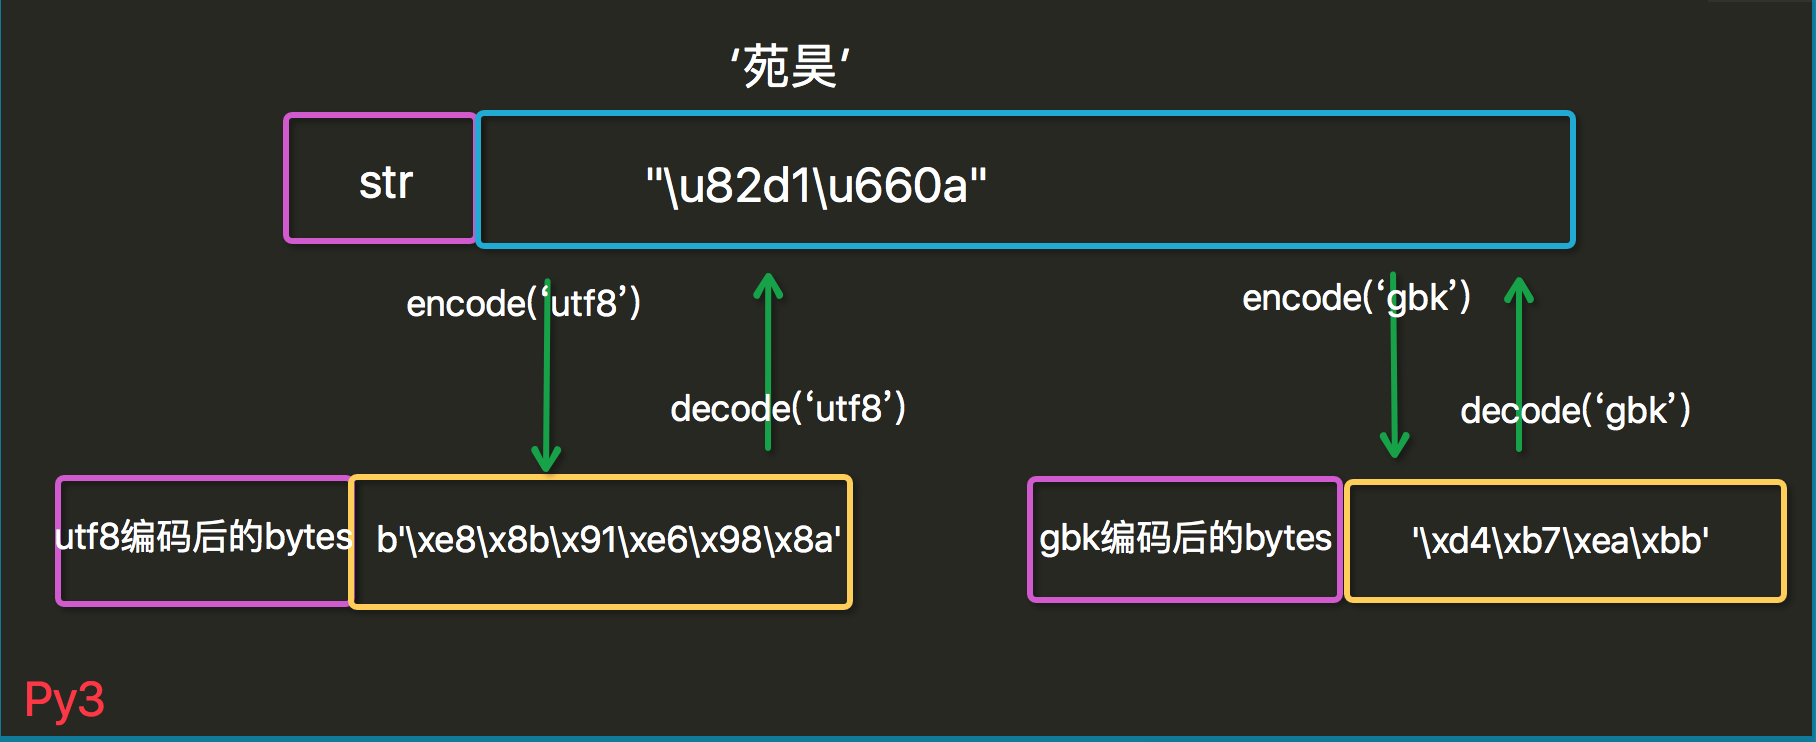

In [1]:
a='我很好' # python3 默认的编码为unicode
print(a)

我很好


**unicode>gb2312**

In [ ]:
unicode_gb2312=a.encode('gb2312')  # #因为默认是unicode所以不需要decode()，直接encode成想要转换的编码如gb2312

In [4]:
print('我的gb2312',unicode_gb2312)

我的gb2312 b'\xce\xd2\xba\xdc\xba\xc3'


**gb2312>utf8**

In [12]:
##当前字符为gb2312所以要先decode成unicode(decode中传入的参数为当前字符的编码集)然后再encode成utf-8

gb2312_utf8=unicode_gb2312.decode('gb2312').encode('utf-8') 

In [13]:
print('我是utf-8',gb2312_utf8)

我是utf-8 b'\xe6\x88\x91\xe5\xbe\x88\xe5\xa5\xbd'


**utf8>gbk**

In [14]:
##当前字符集编码为utf-8要想转换成gbk先decode成unicode字符集再encode成gbk字符集

utf8_gbk=gb2312_utf8.decode('utf-8').encode('gbk')

In [15]:
print("我是gbk",utf8_gbk) 

我是gbk b'\xce\xd2\xba\xdc\xba\xc3'


**utf8>uicode**

In [17]:
utf8_unicode=utf8_gbk.decode('gbk')      ##注意当转换成unicode时 并不需要encode()

In [18]:
print('我是unicode',utf8_unicode)

我是unicode 我很好


**unicode>gb18030**

In [19]:
unicode_gb18030=utf8_unicode.encode('gb18030')
print('我是gb18030',unicode_gb18030)

我是gb18030 b'\xce\xd2\xba\xdc\xba\xc3'


总结各个编码的互相转换都要先转换成unicode然后通过unicode再转换成想要的编码


从上面可以看出gb2312 ，gbk，gb18030返回的结果都是一样的，那是应为这3个都是中国的编码，所以都是向下互相兼容的

中国的编码最先出来的是gb2312,然后是gb18030，最后是gbk，它们所支持的字符数也是随着顺序逐渐增多从最初的7000多到现在的近3万个

**文件从磁盘到内存的编码**

说到这，才来到我们的重点！

抛开执行执行程序，请问大家，文本编辑器大家都是用过吧，如果不懂是什么，那么word总用过吧，ok，当我们在word上编辑文字的时候，不管是中文还是英文，计算机都是不认识的，那么在保存之前数据是通过什么形式存在内存的呢？yes，就是unicode数据，为什么要存unicode数据，这是因为它的名字最屌：万国码！解释起来就是无论英文，中文，日文，拉丁文，世界上的任何字符它都有唯一编码对应，所以兼容性是最好的。

好，那当我们保存了存到磁盘上的数据又是什么呢？

答案是通过某种编码方式编码的bytes字节串。比如utf8-－－一种可变长编码，很好的节省了空间；当然还有历史产物的gbk编码等等。于是，在我们的文本编辑器软件都有默认的保存文件的编码方式，比如utf8，比如gbk。当我们点击保存的时候，这些编辑软件已经"默默地"帮我们做了编码工作。

那当我们再打开这个文件时，软件又默默地给我们做了解码的工作，将数据再解码成unicode,然后就可以呈现明文给用户了！所以，unicode是离用户更近的数据，bytes是离计算机更近的数据。

说了这么多，和我们程序执行有什么关系呢？

先明确一个概念：py解释器本身就是一个软件，一个类似于文本编辑器一样的软件！

我们的文本编辑器有自己默认的编码解码方式，我们的解释器有吗？

In [22]:
import sys
print(sys.getdefaultencoding())

utf-8



#coding:utf8

是的，这就是因为如果py2解释器去执行一个utf8编码的文件，就会以默认地ASCII去解码utf8，

一旦程序中有中文，自然就解码错误了，所以我们在文件开头位置声明　#coding:utf8，

其实就是告诉解释器，你不要以默认的编码方式去解码这个文件，而是以utf8来解码。

而py3的解释器因为默认utf8编码，所以就方便很多了。

**要读取非UTF-8编码的文本文件，需要给open()函数传入encoding参数**

例如，读取GBK编码的文件：

In [ ]:
f = open('gbk.txt', 'r', encoding='gbk')

遇到有些编码不规范的文件，你可能会遇到UnicodeDecodeError，因为在文本文件中可能夹杂了一些非法编码的字符。遇到这种情况，open()函数还接收一个errors参数，表示如果遇到编码错误后如何处理。最简单的方式是直接忽略：

f = open('gbk.txt', 'r', encoding='gbk', errors='ignore')

### 1.1.6 关闭文件

在**Python**中，如果一个打开的文件不再被其他变量引用时，它会自动关闭这个文件。

所以正常情况下，如果一个文件正常被关闭了，忘记调用文件的 `close` 方法不会有什么问题。

关闭文件可以保证内容已经被写入文件，而不关闭可能会出现意想不到的结果：

In [23]:
f = open('newfile.txt','w')
f.write('hello world')
g = open('newfile.txt', 'r')
print(repr(g.read()))

''


虽然这里写了内容，但是在关闭之前，这个内容并没有被写入磁盘。

使用循环写入的内容也并不完整：

In [ ]:
f = open('newfile.txt','w')
for i in range(3000):
    f.write('hello world: ' + str(i) + '\n')

g = open('newfile.txt', 'r')
print (g.read())
f.close()
g.close()

In [25]:
import os
os.remove('newfile.txt')

出现异常时候的读写：

In [11]:
f = open('newfile.txt','w')
for i in range(3000):
    x = 1.0 / (i - 1000)
    f.write('hello world: ' + str(i) + '\n')

ZeroDivisionError: float division by zero

查看已有内容：

In [12]:
g = open('newfile.txt', 'r')
print (g.read())
f.close()
g.close()

hello world: 0
hello world: 1
hello world: 2
hello world: 3
hello world: 4
hello world: 5
hello world: 6
hello world: 7
hello world: 8
hello world: 9
hello world: 10
hello world: 11
hello world: 12
hello world: 13
hello world: 14
hello world: 15
hello world: 16
hello world: 17
hello world: 18
hello world: 19
hello world: 20
hello world: 21
hello world: 22
hello world: 23
hello world: 24
hello world: 25
hello world: 26
hello world: 27
hello world: 28
hello world: 29
hello world: 30
hello world: 31
hello world: 32
hello world: 33
hello world: 34
hello world: 35
hello world: 36
hello world: 37
hello world: 38
hello world: 39
hello world: 40
hello world: 41
hello world: 42
hello world: 43
hello world: 44
hello world: 45
hello world: 46
hello world: 47
hello world: 48
hello world: 49
hello world: 50
hello world: 51
hello world: 52
hello world: 53
hello world: 54
hello world: 55
hello world: 56
hello world: 57
hello world: 58
hello world: 59
hello world: 60
hello world: 61
hello world: 62
he

可以看到，出现异常的时候，磁盘的写入并没有完成，为此我们可以使用 `try/except/finally` 块来关闭文件，这里 `finally` 确保关闭文件，所有的写入已经完成。

In [31]:
f = open('newfile.txt','w')
try:
    for i in range(3000):
        x = 1.0 / (i - 1000)
        f.write('hello world: ' + str(i) + '\n')
except Exception:
    print("something bad happened")
finally:
    f.close()

something bad happened


In [32]:
g = open('newfile.txt', 'r')
print (g.read())
g.close()

hello world: 0
hello world: 1
hello world: 2
hello world: 3
hello world: 4
hello world: 5
hello world: 6
hello world: 7
hello world: 8
hello world: 9
hello world: 10
hello world: 11
hello world: 12
hello world: 13
hello world: 14
hello world: 15
hello world: 16
hello world: 17
hello world: 18
hello world: 19
hello world: 20
hello world: 21
hello world: 22
hello world: 23
hello world: 24
hello world: 25
hello world: 26
hello world: 27
hello world: 28
hello world: 29
hello world: 30
hello world: 31
hello world: 32
hello world: 33
hello world: 34
hello world: 35
hello world: 36
hello world: 37
hello world: 38
hello world: 39
hello world: 40
hello world: 41
hello world: 42
hello world: 43
hello world: 44
hello world: 45
hello world: 46
hello world: 47
hello world: 48
hello world: 49
hello world: 50
hello world: 51
hello world: 52
hello world: 53
hello world: 54
hello world: 55
hello world: 56
hello world: 57
hello world: 58
hello world: 59
hello world: 60
hello world: 61
hello world: 62
he

### 1.1.7 with 方法

事实上，**Python**提供了更安全的方法，当 `with` 块的内容结束后，**Python**会自动调用它的`close` 方法，确保读写的安全：

In [13]:
with open('newfile.txt','w') as f:
    for i in range(3000):
        x = 1.0 / (i - 1000)
        f.write('hello world: ' + str(i) + '\n')

ZeroDivisionError: float division by zero

与 `try/exception/finally` 效果相同，但更简单。

In [14]:
g = open('newfile.txt', 'r')
print (g.read())
g.close()

hello world: 0
hello world: 1
hello world: 2
hello world: 3
hello world: 4
hello world: 5
hello world: 6
hello world: 7
hello world: 8
hello world: 9
hello world: 10
hello world: 11
hello world: 12
hello world: 13
hello world: 14
hello world: 15
hello world: 16
hello world: 17
hello world: 18
hello world: 19
hello world: 20
hello world: 21
hello world: 22
hello world: 23
hello world: 24
hello world: 25
hello world: 26
hello world: 27
hello world: 28
hello world: 29
hello world: 30
hello world: 31
hello world: 32
hello world: 33
hello world: 34
hello world: 35
hello world: 36
hello world: 37
hello world: 38
hello world: 39
hello world: 40
hello world: 41
hello world: 42
hello world: 43
hello world: 44
hello world: 45
hello world: 46
hello world: 47
hello world: 48
hello world: 49
hello world: 50
hello world: 51
hello world: 52
hello world: 53
hello world: 54
hello world: 55
hello world: 56
hello world: 57
hello world: 58
hello world: 59
hello world: 60
hello world: 61
hello world: 62
he

所以，写文件时候要确保文件被正确关闭。

In [ ]:
import os
os.remove('newfile.txt')

## 1.2 StringIO和BytesIO

很多时候，数据读写不一定是文件，也可以在内存中读写。

### 1.2.1 StringIO

顾名思义就是在内存中读写str。

要把str写入StringIO，我们需要先创建一个StringIO，然后，像文件一样写入即可：

In [31]:
from io import StringIO

f = StringIO()
f.write('hello')

5

In [32]:
f.write(' ')

1

In [33]:
f.write('world!')

6

In [34]:
print(f.getvalue())  # getvalue()方法用于获得写入后的str。

hello world!



要读取StringIO，可以用一个str初始化StringIO，然后，像读文件一样读取：

In [35]:
from io import StringIO

f = StringIO('Hello!\nHi!\nGoodbye!')
while True:
    s = f.readline()
    if s == '':
        break
    print(s.strip())

Hello!
Hi!
Goodbye!


### 1.2.2 BytesIO

StringIO操作的只能是str，如果要操作二进制数据，就需要使用BytesIO。

BytesIO实现了在内存中读写bytes，我们创建一个BytesIO，然后写入一些bytes：

In [37]:
from io import BytesIO

f = BytesIO()

f.write('中文'.encode('utf-8'))

6

In [38]:
print(f.getvalue())

b'\xe4\xb8\xad\xe6\x96\x87'


请注意，写入的不是str，而是经过UTF-8编码的bytes。

和StringIO类似，可以用一个bytes初始化BytesIO，然后，像读文件一样读取：

In [39]:
from io import BytesIO
f = BytesIO(b'\xe4\xb8\xad\xe6\x96\x87')
print(f.read())
print(f.getvalue().decode('utf-8'))

b'\xe4\xb8\xad\xe6\x96\x87'
中文


## 1.3 操作文件和目录

Python内置的os模块也可以直接调用操作系统提供的接口函数

### 1.3.1 操作系统类型

In [40]:
import os
os.name # 操作系统类型

'nt'

如果是posix，说明系统是Linux、Unix或Mac OS X，如果是nt，就是Windows系统。

要获取详细的系统信息，可以调用uname()函数：

注意uname()函数在Windows上不提供，也就是说，os模块的某些函数是跟操作系统相关的。

In [ ]:
# os.uname() 

### 1.3.2 环境变量

在操作系统中定义的环境变量，全部保存在os.environ这个变量中，可以直接查看：

In [41]:
os.environ

environ({'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\guojige\\AppData\\Roaming', 'AWE_DIR': 'C:\\Program Files (x86)\\Khrona LLC\\Awesomium SDK\\1.6.6\\', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'DESKTOP-LIHK6TS', 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe', 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer', 'FPS_BROWSER_USER_PROFILE_STRING': 'Default', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\guojige', 'LOCALAPPDATA': 'C:\\Users\\guojige\\AppData\\Local', 'LOGONSERVER': '\\\\DESKTOP-LIHK6TS', 'MOZ_PLUGIN_PATH': 'C:\\Program Files (x86)\\Foxit Software\\Foxit Reader\\plugins\\', 'NUMBER_OF_PROCESSORS': '8', 'ONEDRIVE': 'C:\\Users\\guojige\\OneDrive', 'ONLINESERVICES': 'Online Services', 'OS': 'Windows_NT', 'PATH': 'C:\\ProgramData\\Anaconda3;C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ProgramData\\

要获取某个环境变量的值，可以调用os.environ.get('key')：

In [43]:
os.environ.get('OS')

'Windows_NT'

In [ ]:
os.environ.get('x', 'default')

### 1.3.3 文件和目录

操作文件和目录的函数一部分放在os模块中，一部分放在os.path模块中，这一点要注意一下。查看、创建和删除目录可以这么调用：

In [45]:
# 查看当前目录的绝对路径:

print(os.path.abspath('.'))
print(os.path.abspath('..'))

C:\Code\python\Python-Course-HK\day6-文件IO
C:\Code\python\Python-Course-HK


In [46]:
# 在某个目录下创建一个新目录，首先把新目录的完整路径表示出来:
os.path.join('F:/', 'testdir')

'F:/testdir'

In [47]:
# 然后创建一个目录:
os.mkdir('F:/testdir')

In [48]:
# 删掉一个目录:

os.rmdir('F:/testdir')

把两个路径合成一个时，不要直接拼字符串，而要通过os.path.join()函数，这样可以正确处理不同操作系统的路径分隔符。在Linux/Unix/Mac下，os.path.join()返回这样的字符串：

part-1/part-2
而Windows下会返回这样的字符串：

part-1\part-2
同样的道理，要拆分路径时，也不要直接去拆字符串，而要通过os.path.split()函数，这样可以把一个路径拆分为两部分，后一部分总是最后级别的目录或文件名：


In [49]:
os.path.split('/Users/michael/testdir/file.txt')

('/Users/michael/testdir', 'file.txt')

os.path.splitext()可以直接让你得到文件扩展名，很多时候非常方便：

In [50]:
os.path.splitext('/path/to/file.txt')

('/path/to/file', '.txt')

这些合并、拆分路径的函数并不要求目录和文件要真实存在，它们只对字符串进行操作。

文件操作使用下面的函数。假定当前目录下有一个test.txt文件：

In [ ]:
# 对文件重命名:
os.rename('test.txt', 'test.py')
# 删掉文件:
os.remove('test.py')

但是复制文件的函数居然在os模块中不存在！原因是复制文件并非由操作系统提供的系统调用。理论上讲，我们通过上一节的读写文件可以完成文件复制，只不过要多写很多代码。

幸运的是shutil模块提供了copyfile()的函数，你还可以在shutil模块中找到很多实用函数，它们可以看做是os模块的补充。

最后看看如何利用Python的特性来过滤文件。比如我们要列出当前目录下的所有目录，只需要一行代码：

最后看看如何利用Python的特性来过滤文件。比如我们要列出当前目录下的所有目录，只需要一行代码：

In [53]:
[x for x in os.listdir('.') if os.path.isdir(x)]

['.ipynb_checkpoints', 'test_dir']

要列出所有的.py文件，也只需一行代码：

In [55]:
[x for x in os.listdir('.') if os.path.isfile(x) and os.path.splitext(x)[1]=='.ipynb']

['06.01-file-IO.ipynb',
 '06.02-interacting-with-the-OS---os.ipynb',
 '06.03-pprint.ipynb',
 '06.04-pickle-and-cPickle.ipynb',
 '06.05-json.ipynb',
 '06.06-glob.ipynb',
 '06.07-shutil.ipynb',
 '06.08-gzip,-zipfile,-tarfile.ipynb',
 '06.09-comma-separated-values.ipynb',
 '文件IO.ipynb']

`os` 模块提供了对系统文件进行操作的方法：

In [1]:
import os

## 文件路径操作

- `os.remove(path)` 或 `os.unlink(path)` ：删除指定路径的文件。路径可以是全名，也可以是当前工作目录下的路径。
- `os.removedirs`：删除文件，并删除中间路径中的空文件夹
- `os.chdir(path)`：将当前工作目录改变为指定的路径
- `os.getcwd()`：返回当前的工作目录
- `os.curdir`：表示当前目录的符号
- `os.rename(old, new)`：重命名文件
- `os.renames(old, new)`：重命名文件，如果中间路径的文件夹不存在，则创建文件夹
- `os.listdir(path)`：返回给定目录下的所有文件夹和文件名，不包括 `'.'` 和 `'..'` 以及子文件夹下的目录。（`'.'` 和 `'..'` 分别指当前目录和父目录）
- `os.mkdir(name)`：产生新文件夹
- `os.makedirs(name)`：产生新文件夹，如果中间路径的文件夹不存在，则创建文件夹

当前目录：

In [2]:
os.getcwd()

'/home/lijin/notes-python/05. advanced python'

当前目录的符号：

In [3]:
os.curdir

'.'

当前目录下的文件：

In [4]:
os.listdir(os.curdir)

['05.01 overview of the sys module.ipynb',
 '05.05 datetime.ipynb',
 '05.13 decorator usage.ipynb',
 '.ipynb_checkpoints',
 '05.03 comma separated values.ipynb',
 '05.02 interacting with the OS - os.ipynb',
 '05.10 generators.ipynb',
 '05.15 scope.ipynb',
 '05.12 decorators.ipynb',
 '05.09 iterators.ipynb',
 'my_database.sqlite',
 '05.11 context managers and the with statement.ipynb',
 '05.16 dynamic code execution.ipynb',
 '05.14 the operator functools itertools toolz fn funcy module.ipynb',
 '05.04 regular expression.ipynb',
 '05.07 object-relational mappers.ipynb',
 '05.08 functions.ipynb',
 '05.06 sql databases.ipynb']

产生文件：

In [5]:
f = open("test.file", "w")
f.close()

print "test.file" in os.listdir(os.curdir)

True


重命名文件：

In [6]:
os.rename("test.file", "test.new.file")

print "test.file" in os.listdir(os.curdir)
print "test.new.file" in os.listdir(os.curdir)

False
True


删除文件：

In [7]:
os.remove("test.new.file")

## 系统常量

当前操作系统的换行符：

In [8]:
# windows 为 \r\n
os.linesep

'\n'

当前操作系统的路径分隔符：

In [9]:
os.sep

'/'

当前操作系统的环境变量中的分隔符（`';'` 或 `':'`）：

In [10]:
os.pathsep

':'

## 其他

`os.environ` 是一个存储所有环境变量的值的字典，可以修改。

In [11]:
os.environ["USER"]

'lijin'

`os.urandom(len)` 返回指定长度的随机字节。

## os.path 模块

不同的操作系统使用不同的路径规范，这样当我们在不同的操作系统下进行操作时，可能会带来一定的麻烦，而 `os.path` 模块则帮我们解决了这个问题。

In [12]:
import os.path

### 测试

- `os.path.isfile(path)` ：检测一个路径是否为普通文件
- `os.path.isdir(path)`：检测一个路径是否为文件夹
- `os.path.exists(path)`：检测路径是否存在
- `os.path.isabs(path)`：检测路径是否为绝对路径

### split 和 join

- `os.path.split(path)`：拆分一个路径为 `(head, tail)` 两部分
- `os.path.join(a, *p)`：使用系统的路径分隔符，将各个部分合成一个路径

### 其他

- `os.path.abspath()`：返回路径的绝对路径
- `os.path.dirname(path)`：返回路径中的文件夹部分
- `os.path.basename(path)`：返回路径中的文件部分
- `os.path.splitext(path)`：将路径与扩展名分开
- `os.path.expanduser(path)`：展开 `'~'` 和 `'~user'`

## 1.4 与操作系统进行交互：os 模块